# Optimization with Gradients: An Example

In the previous lesson, we saw how to find the minimum of a function in one dimension. Now, let's extend that to a more realistic, two-dimensional problem.

### The 2D Sauna Problem
Imagine you are standing in a 5x5 meter sauna. You are starting to feel hot and want to find the coolest spot in the room. The temperature is not uniform; it varies based on your `(x, y)` coordinates.

The temperature in the room can be described by a 3D surface, where the height represents the temperature at each point. Our goal is to find the coordinates of the lowest point on this surface.

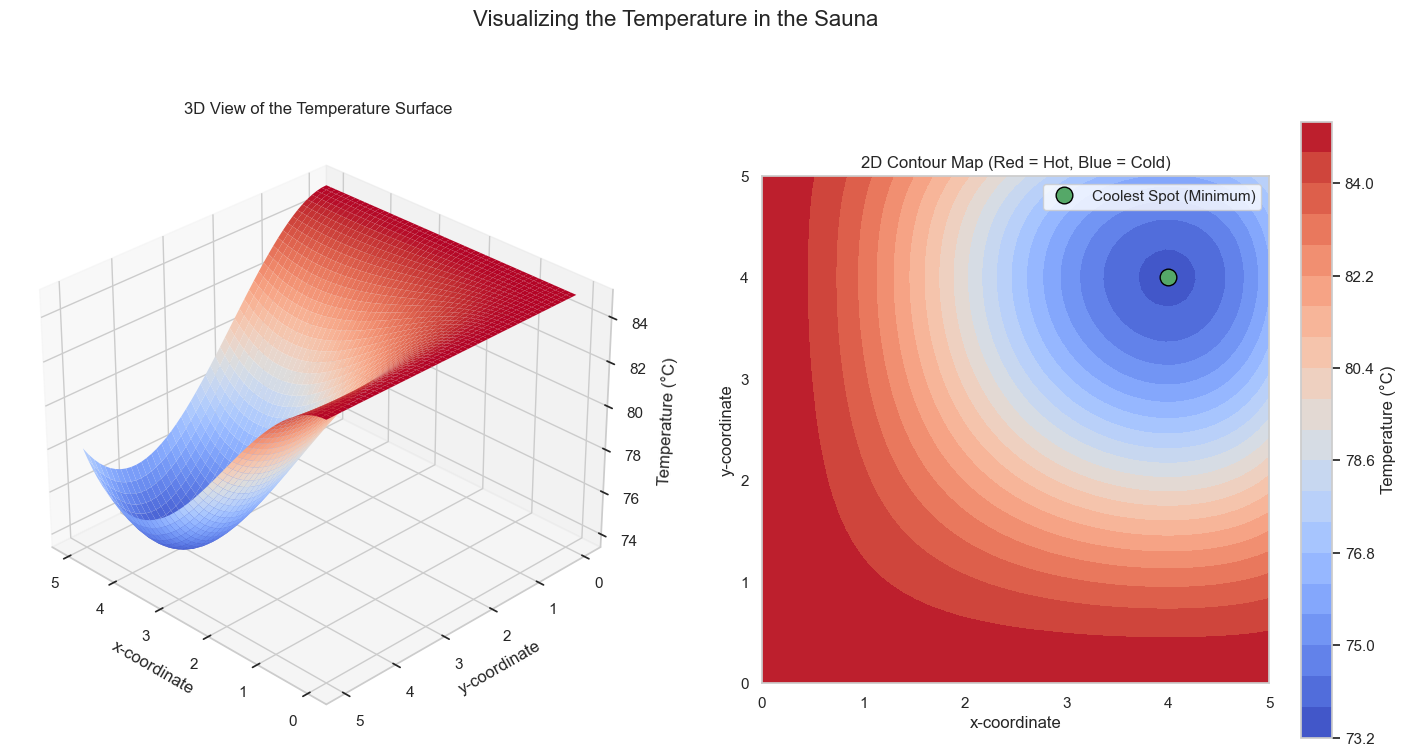

In [1]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# --- Define the temperature function ---
def temp_func(x, y):
    term1 = (x**2) * (x - 6)
    term2 = (y**2) * (y - 6)
    return 85 - (1/90) * term1 * term2

# --- Create data for the plots ---
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)
T = temp_func(X, Y)

# --- Create the visualizations ---
fig = plt.figure(figsize=(18, 8))
fig.suptitle('Visualizing the Temperature in the Sauna', fontsize=16, y=1.02)

# --- Plot 1: 3D Surface Plot ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, T, cmap='coolwarm', rstride=1, cstride=1, edgecolor='none')
ax1.set_title('3D View of the Temperature Surface')
ax1.set_xlabel('x-coordinate')
ax1.set_ylabel('y-coordinate')
ax1.set_zlabel('Temperature (°C)')
ax1.view_init(elev=30, azim=135)

# --- Plot 2: 2D Contour Plot (Top-Down View) ---
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(X, Y, T, levels=20, cmap='coolwarm')
fig.colorbar(contour, ax=ax2, label='Temperature (°C)')
ax2.set_title('2D Contour Map (Red = Hot, Blue = Cold)')
ax2.set_xlabel('x-coordinate')
ax2.set_ylabel('y-coordinate')
ax2.set_aspect('equal', adjustable='box')

# Highlight the minimum
ax2.plot(4, 4, 'go', markersize=12, markeredgecolor='black', label='Coolest Spot (Minimum)')
ax2.legend()

plt.show()

---

## Finding the Minimum

As we learned with one-variable functions, the minimum of a function occurs where its derivative is zero. For a function of two variables, this means the **tangent plane** is horizontal, which happens when **both partial derivatives are simultaneously zero**.

In other words, we need to find the point `(x, y)` where the gradient is the zero vector:
$$ \nabla T(x, y) = \begin{bmatrix} \frac{\partial T}{\partial x} \\ \frac{\partial T}{\partial y} \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} $$

**The Temperature Function:**
$$ T(x, y) = 85 - \frac{1}{90}(x^3 - 6x^2)(y^3 - 6y^2) $$

### Step 1: Find the Partial Derivatives
After applying the product rule and simplifying, we get the partial derivatives:
* $ \frac{\partial T}{\partial x} = -\frac{1}{90} (3x^2 - 12x)(y^3 - 6y^2) = -\frac{1}{90} (3x(x-4))(y^2(y-6)) $  

* $ \frac{\partial T}{\partial y} = -\frac{1}{90} (x^3 - 6x^2)(3y^2 - 12y) = -\frac{1}{90} (x^2(x-6))(3y(y-4)) $

### Step 2: Set Both Derivatives to Zero
We need to find the `(x, y)` pairs that solve this system of equations:
1.  $-\frac{1}{90} (3x(x-4))(y^2(y-6)) = 0$  

2.  $-\frac{1}{90} (x^2(x-6))(3y(y-4)) = 0$

For the first equation to be zero, one of its factors must be zero. This gives us potential solutions:
* `x = 0`
* `x = 4`
* `y = 0`
* `y = 6`

For the second equation to be zero, one of its factors must be zero:
* `x = 0`
* `x = 6`
* `y = 0`
* `y = 4`

### Step 3: Find the Common Solutions
We need the points `(x, y)` that satisfy **both** equations. By checking the possible combinations, we find the "critical points" where the gradient is zero: `(0,0)`, `(0,4)`, `(0,6)`, `(4,0)`, `(4,4)`, `(6,0)`, `(6,4)`, and `(6,6)`.

### Step 4: Evaluate the Candidates
Finally, we evaluate the temperature function at each of these candidate points (within our 5x5 sauna) to find which one is the true minimum.

* **T(0, 0) = 85°C** (Maximum)
* **T(0, 4) = 85°C** (Maximum)
* **T(4, 0) = 85°C** (Maximum)
* **T(4, 4) = 73.6°C** (Minimum)

The calculus confirms that the coolest spot in the sauna is at the coordinates **(4, 4)**.